<a href="https://colab.research.google.com/github/boxty123/ComputerVision/blob/main/ComputerVision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2    # OpenCV를 사용하기 위해 cv2 import

import numpy as np   # 넘파이 사용
import matplotlib.pyplot as plt   # matplotlib : 시각화라이브러리

from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

# 2-1


--2025-04-11 06:16:30--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif.1’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.007s  

2025-04-11 06:16:30 (76.2 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif.1’ saved [589115/589115]

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


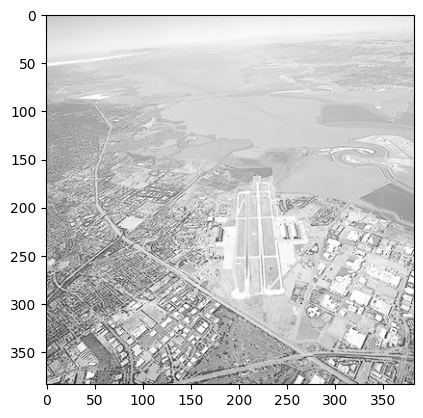

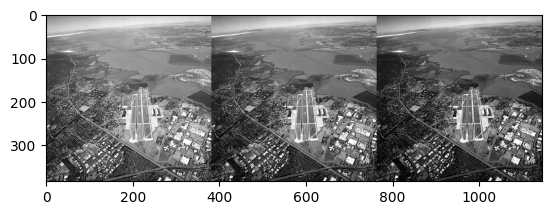

'\n=======결과 분석============\n감마 보정을 통해 실험을 진행했다.감마값을 3,4,5로 하여 어두운 영역은 더 어둡고 밝은 영역은 더 밝게 처리했다.\n'

In [22]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif'

img = cv2.imread('Fig0309(a)(washed_out_aerial_image).tif')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

img=cv2.resize(img,dsize=(0,0),fx=0.5,fy=0.5)
plt.imshow(img,cmap='gray')
plt.show()

def gamma(f,gamma=1.0):
  f1=f/255.0
  return np.uint8(255*(f1**gamma))

gc=np.hstack((gamma(img,3),gamma(img,4),gamma(img,5)))
plt.imshow(gc,cmap='gray')
plt.show()

"""
=======결과 분석============
감마 보정을 통해 실험을 진행했다.감마값을 3,4,5로 하여 어두운 영역은 더 어둡고 밝은 영역은 더 밝게 처리했다.
"""

#2-2

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


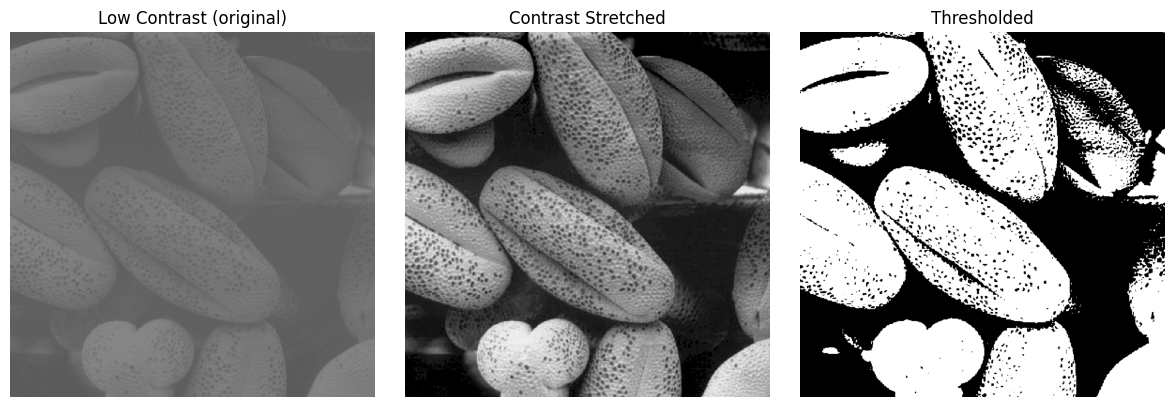

'\n원본 이미지는 흑백 명암 구분이 명확하지 않았다.\n반면 contrast stretched 이미지는 명암대비가 커져 구분이 명확하다\n마지막으로 thresholded이미지는 명암 정보를 이진화하여 표현하여 형태는 명확하지만 세부 정보는 손실될 수 있다. .\n'

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('Fig0310(b)(washed_out_pollen_image).tif')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def piecewise_linear_transform(image, r1, s1, r2, s2):
    L = 256
    output = np.zeros_like(image, dtype=np.uint8)

    for r in range(L):
        if r < r1:
            s = (s1 / r1) * r
        elif r <= r2:
            s = ((s2 - s1) / (r2 - r1)) * (r - r1) + s1
        else:
            s = ((L - 1 - s2) / (L - 1 - r2)) * (r - r2) + s2
        output[image == r] = np.clip(s, 0, 255)

    return output

# 명암 대비 확장
contrast_stretched = piecewise_linear_transform(gray, 70, 30, 140, 220)

# 임계값 적용 (예: 127 기준 이진화)
_, thresholded = cv2.threshold(contrast_stretched, 127, 255, cv2.THRESH_BINARY)

# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Low Contrast (original)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title("Contrast Stretched")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresholded, cmap='gray')
plt.title("Thresholded")
plt.axis('off')

plt.tight_layout()
plt.show()


"""
원본 이미지는 흑백 명암 구분이 명확하지 않았다.
반면 contrast stretched 이미지는 명암대비가 커져 구분이 명확하다
마지막으로 thresholded이미지는 명암 정보를 이진화하여 표현하여 형태는 명확하지만 세부 정보는 손실될 수 있다. .
"""

#2-3

--2025-04-11 06:16:32--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/soccer.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 449034 (439K) [image/jpeg]
Saving to: ‘soccer.jpg.2’

soccer.jpg.2        100%[===================>] 438.51K  --.-KB/s    in 0.005s  

2025-04-11 06:16:32 (82.2 MB/s) - ‘soccer.jpg.2’ saved [449034/449034]

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


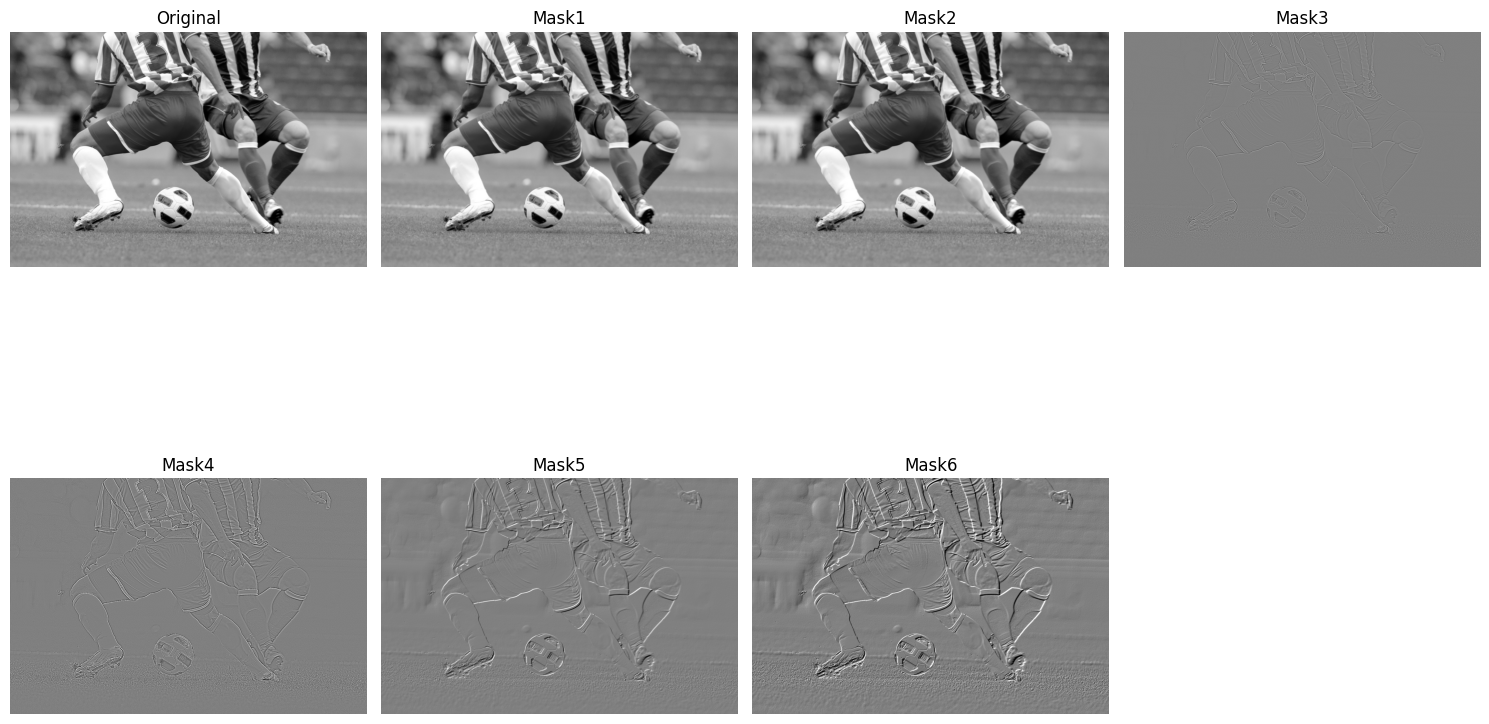

'\n마스크 1은 평균 블러로 중간 픽셀들의 평균값을 이용해 중심 픽셀을 그 값으로 바꿔 영상을 흐리게 만든다.\n마스크 2는 가우시안 블러를 사용하여 노이즈 제거 및 부드러운 블러 효과를 적용했다.\n마스크 3,4는 라플라시안 필터로 객체의 엣지를 검출하는데 사용됐다.\n마스크 5,6은 방향 필터로 특정 방향에서의 엣지 검출을 강조했다.\n'

In [24]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/soccer.jpg'
img = cv2.imread('soccer.jpg')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


mask1 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

mask2 = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
])

mask3 = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
])

mask4 = np.array([
    [-1,  -1,  -1],
    [-1,  8,  -1],
    [-1,  -1,  -1]
])

mask5 = np.array([
    [-1, 0, 0],
    [ 0, 0,  0],
    [ 0, 0,  1]
])

mask6 = np.array([
    [-1, -1, 0],
    [ -1,  0,  1],
    [ 0,  1,  1]
])

gray16=np.int16(gray)  ## 필터 연산 중 음수가 나올 수 있으므로 16비트 정수로 변환 (안전하게 부호있는 정수int16으로 변환하여) 음수도 담을 수 있도록 함.


filtered = cv2.filter2D(gray, -1, mask1)
filtered2 = cv2.filter2D(gray, -1, mask2)


filtered3=np.uint8(np.clip(cv2.filter2D(gray16,-1,mask3)+128,0,255))
filtered4=np.uint8(np.clip(cv2.filter2D(gray16,-1,mask4)+128,0,255))
filtered5=np.uint8(np.clip(cv2.filter2D(gray16,-1,mask5)+128,0,255))
filtered6=np.uint8(np.clip(cv2.filter2D(gray16,-1,mask6)+128,0,255))


titles = ["Original","Mask1","Mask2","Mask3","Mask4","Mask5","Mask6"]

images = [gray, filtered, filtered2, filtered3, filtered4, filtered5, filtered6]

plt.figure(figsize=(15, 10))
for i in range(7):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()



"""
마스크 1은 평균 블러로 중간 픽셀들의 평균값을 이용해 중심 픽셀을 그 값으로 바꿔 영상을 흐리게 만든다.
마스크 2는 가우시안 블러를 사용하여 노이즈 제거 및 부드러운 블러 효과를 적용했다.
마스크 3,4는 라플라시안 필터로 객체의 엣지를 검출하는데 사용됐다.
마스크 5,6은 방향 필터로 특정 방향에서의 엣지 검출을 강조했다.
"""

#2-4

--2025-04-11 06:16:34--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824868 (806K) [image/jpeg]
Saving to: ‘school.jpg’

school.jpg          100%[===================>] 805.54K  --.-KB/s    in 0.008s  

2025-04-11 06:16:34 (102 MB/s) - ‘school.jpg’ saved [824868/824868]

이미지를 읽어왔습니다.
변수 타입: <class 'numpy.ndarray'>


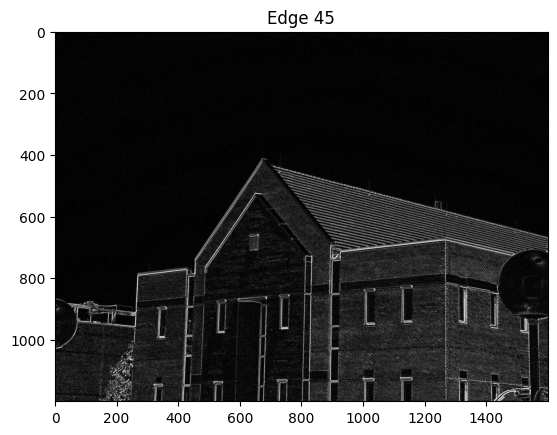

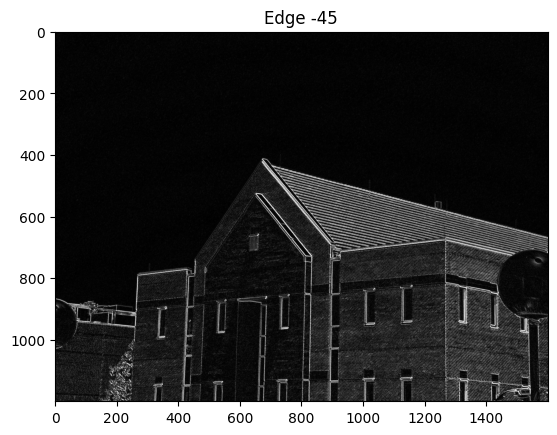

In [25]:

!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"
img=cv2.imread('school.jpg')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")
print(f"변수 타입: {type(img)}")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 45도 방향 커널
kernel_45 = np.array([[ -2, -1, 0],
                      [  -1, 0, 1],
                      [  0, 1, 2]])

# -45도 방향 커널
kernel_minus_45 = np.array([[ 0, -1, -2],
                            [ 1, 0,  -1],
                            [2, 1,  0]])

# 필터 적용
edge_45 = cv2.filter2D(gray, cv2.CV_16S, kernel_45)
edge_45 = cv2.convertScaleAbs(edge_45)

edge_minus_45 = cv2.filter2D(gray, cv2.CV_16S, kernel_minus_45)
edge_minus_45 = cv2.convertScaleAbs(edge_minus_45)

# 출력

plt.title("Edge 45")
plt.imshow(edge_45, cmap='gray')
plt.show()

plt.title("Edge -45")
plt.imshow(edge_minus_45, cmap='gray')
plt.show()


#2-5

--2025-04-11 06:16:36--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73452 (72K) [image/jpeg]
Saving to: ‘finger.jpg’

finger.jpg          100%[===================>]  71.73K  --.-KB/s    in 0.002s  

2025-04-11 06:16:36 (46.2 MB/s) - ‘finger.jpg’ saved [73452/73452]

이미지를 읽어왔습니다.


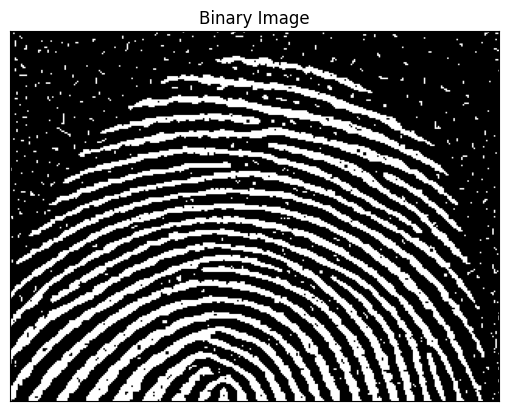

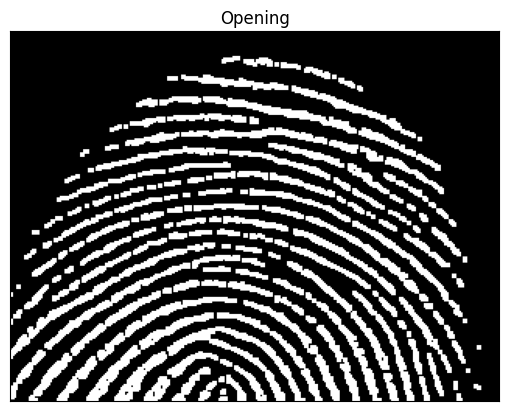

'\n오프닝 연산을 적용하여 배경의 노이즈를 제거한 후 불필요하 요소를 제거한 상태에서 객체의 형태를 유지했다.\n'

In [26]:
# 이미지 읽기
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg'
img = cv2.imread('finger.jpg')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

# 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화 (오츠 방법 사용)
t, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Binary Image")
plt.show()


# 구조 요소 정의
se = np.uint8([[1,1,1],
               [1,1,1],
               [1,1,1]])

"""
# 침식

b_erosion = cv2.erode(bin_img, se, iterations=1)
plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Erosion")
plt.show()

# 팽창

b_dilation = cv2.dilate(bin_img, se, iterations=1)
plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Dilation")
plt.show()
"""
# 오프닝
b_opening = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, se)
plt.imshow(b_opening, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Opening")
plt.show()



"""
오프닝 연산을 적용하여 배경의 노이즈를 제거한 후 불필요하 요소를 제거한 상태에서 객체의 형태를 유지했다.
"""

#2-6 (어떻게 했는지 분석)

--2025-04-11 06:16:36--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30092 (29K) [image/tiff]
Saving to: ‘Fig0905(a)(wirebond-mask).tif’

Fig0905(a)(wirebond 100%[===================>]  29.39K  --.-KB/s    in 0s      

2025-04-11 06:16:36 (120 MB/s) - ‘Fig0905(a)(wirebond-mask).tif’ saved [30092/30092]

이미지를 읽어왔습니다.


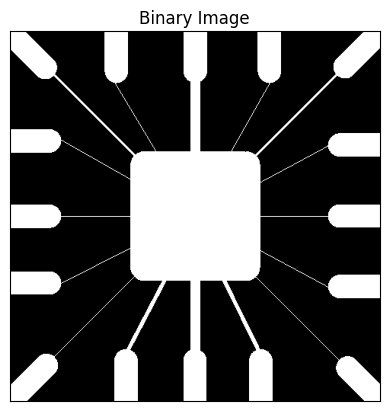


4x4 침식(erode) 연산 후


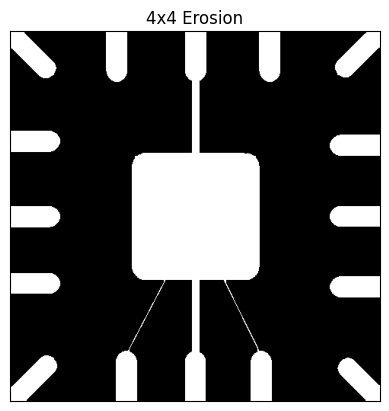

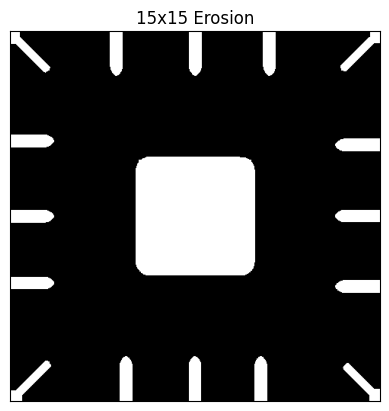

'\n4x4 마스크를 사용해서 침식을 진행했을땐 굵은 선을 제외한 얇은 선들이 제거 되었다.\n15x15 마스크를 사용해서 침식을 진행했을땐 굵은 선들이 제거 되었다.\n침식이란 각 픽셀을 중심으로 구조 요소가 완전히 겹쳐져야만 픽셀을 유지하는 연산이다.\n'

In [27]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif'
img = cv2.imread('Fig0905(a)(wirebond-mask).tif')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

# 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진화 (오츠 방법 사용)
t, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Binary Image")
plt.show()


# 구조 요소 정의
se = np.uint8([[1,1,1,1],
               [1,1,1,1],
               [1,1,1,1],
               [1,1,1,1]])

#4x4의 마스크를 사용해서 제거한다
print("\n4x4 침식(erode) 연산 후")
b_erosion = cv2.erode(bin_img, se, iterations=1)
plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("4x4 Erosion")
plt.show()


# 구조 요소 정의 15x15의 마스크를 사용해서 더 많은 요소를 제거한다
array_15x15 = np.ones((15, 15), dtype=np.uint8)

b_erosion = cv2.erode(bin_img, array_15x15, iterations=1)
plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("15x15 Erosion")
plt.show()

"""
4x4 마스크를 사용해서 침식을 진행했을땐 굵은 선을 제외한 얇은 선들이 제거 되었다.
15x15 마스크를 사용해서 침식을 진행했을땐 굵은 선들이 제거 되었다.
침식이란 각 픽셀을 중심으로 구조 요소가 완전히 겹쳐져야만 픽셀을 유지하는 연산이다.
"""



# 2-7

--2025-04-11 06:16:36--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262750 (257K) [image/tiff]
Saving to: ‘Fig0939(a)(headCT-Vandy).tif.1’

Fig0939(a)(headCT-V 100%[===================>] 256.59K  --.-KB/s    in 0.004s  

2025-04-11 06:16:37 (59.8 MB/s) - ‘Fig0939(a)(headCT-Vandy).tif.1’ saved [262750/262750]

이미지를 읽어왔습니다.


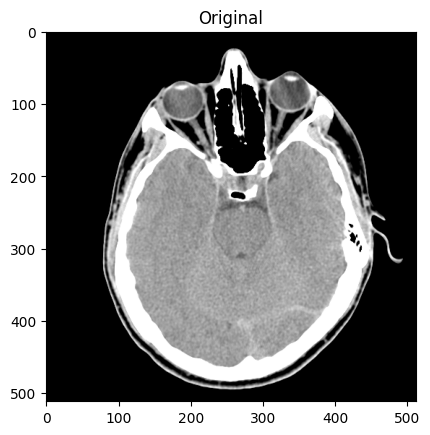

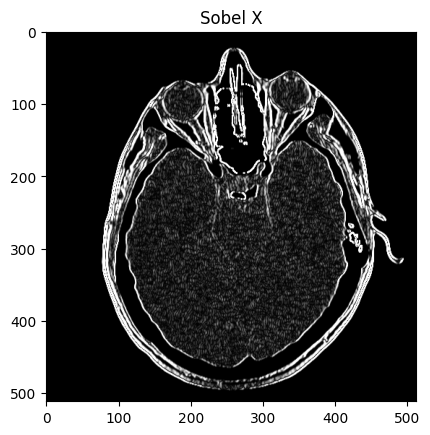

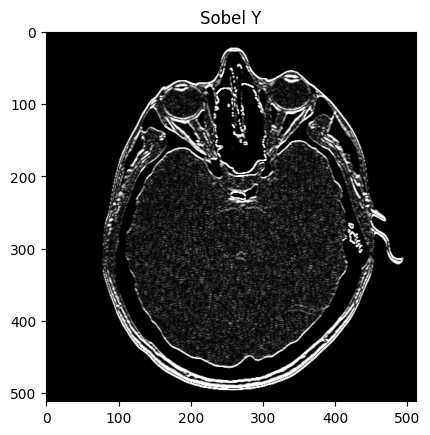

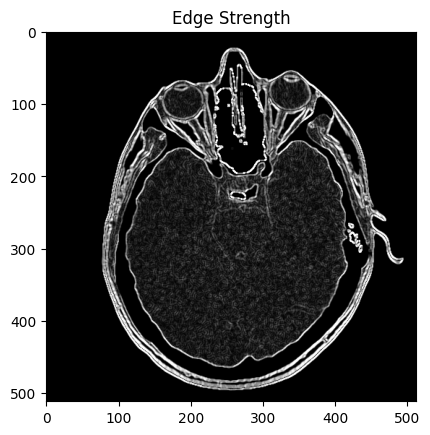

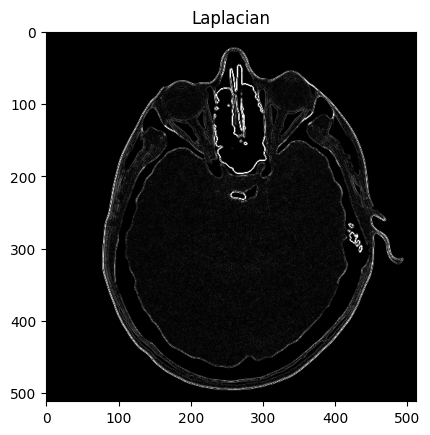

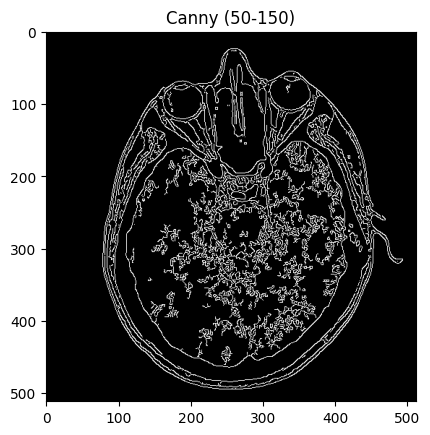

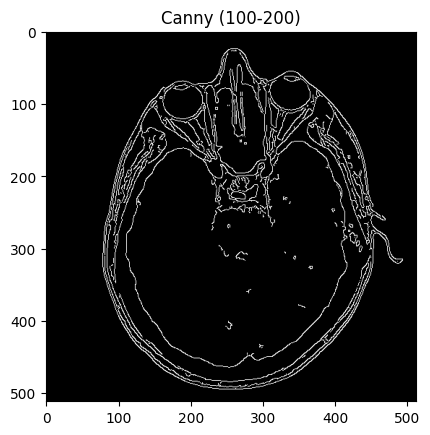

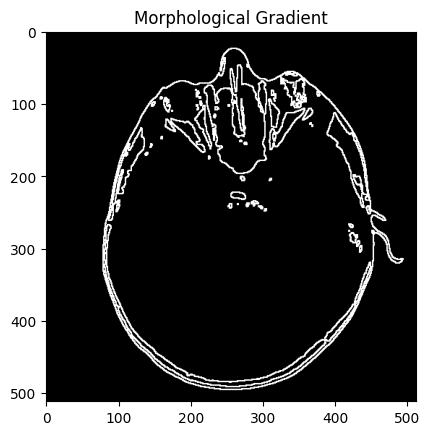

'\n비교분석\n모두 엣지 검출 알고리즘이지만 차이점이 있다.\n1. Sobel:뱡향성있는 엣지(x,y)를 검출하는데 유리하다.\n2. Laplacian:방향성이 없는 연산자를 사용한다. 다만 노이즈에 민감에 가우시안을 적용하고 사용한다.\n3. Canny:영상에 가우시안 스무딩을 적용한 후 소벨 연산자를 적용해 엣지 강도와 엣지 방향 맵을 생성한다.\n         이후 비최대 억제를 적용 얇은 두께 엣지 맵 생성을 진행해 임계값을 적용해 거짓 긍정을 제거한다.\n         이로 인해 가장 정교하고 신뢰도 높은 엣지 검출이 가능하다.\n4. Morphological Gradient:팽창 및 침식을 활용하여 객체의 윤곽선만 추출한다.\n'

In [28]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif'
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('Fig0939(a)(headCT-Vandy).tif')

if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

# 그레이스케일
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Sobel
grad_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)

sobel_x = cv2.convertScaleAbs(grad_x)
sobel_y = cv2.convertScaleAbs(grad_y)

edge_strength = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

plt.imshow(gray, cmap='gray'), plt.title("Original"), plt.show()
plt.imshow(sobel_x, cmap='gray'), plt.title("Sobel X"), plt.show()
plt.imshow(sobel_y, cmap='gray'), plt.title("Sobel Y"), plt.show()
plt.imshow(edge_strength, cmap='gray'), plt.title("Edge Strength"), plt.show()

# Laplacian
laplacian = cv2.Laplacian(gray, cv2.CV_32F)
laplacian = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian, cmap='gray'), plt.title("Laplacian"), plt.show()

# Canny
canny1 = cv2.Canny(gray, 50, 150)
plt.imshow(canny1, cmap='gray'), plt.title("Canny (50-150)"), plt.show()
canny1 = cv2.Canny(gray,100 , 200)
plt.imshow(canny1, cmap='gray'), plt.title("Canny (100-200)"), plt.show()

# Morphological Gradient
_, b = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
se = np.ones((3, 3), np.uint8)
b_dilation = cv2.dilate(b, se, iterations=1)
b_erosion = cv2.erode(b, se, iterations=1)
b_gradient = cv2.subtract(b_dilation, b_erosion)

plt.imshow(b_gradient, cmap='gray'), plt.title("Morphological Gradient"), plt.show()

"""
비교분석
모두 엣지 검출 알고리즘이지만 차이점이 있다.
1. Sobel:뱡향성있는 엣지(x,y)를 검출하는데 유리하다.
2. Laplacian:방향성이 없는 연산자를 사용한다. 다만 노이즈에 민감에 가우시안을 적용하고 사용한다.
3. Canny:영상에 가우시안 스무딩을 적용한 후 소벨 연산자를 적용해 엣지 강도와 엣지 방향 맵을 생성한다.
         이후 비최대 억제를 적용 얇은 두께 엣지 맵 생성을 진행해 임계값을 적용해 거짓 긍정을 제거한다.
         이로 인해 가장 정교하고 신뢰도 높은 엣지 검출이 가능하다.
4. Morphological Gradient:팽창 및 침식을 활용하여 객체의 윤곽선만 추출한다.
"""


#2-8

--2025-04-11 06:16:39--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321002 (313K) [image/tiff]
Saving to: ‘Fig0938(a)(cygnusloop_Xray_original).tif.1’

Fig0938(a)(cygnuslo 100%[===================>] 313.48K  --.-KB/s    in 0.007s  

2025-04-11 06:16:39 (45.0 MB/s) - ‘Fig0938(a)(cygnusloop_Xray_original).tif.1’ saved [321002/321002]

이미지를 읽어왔습니다.


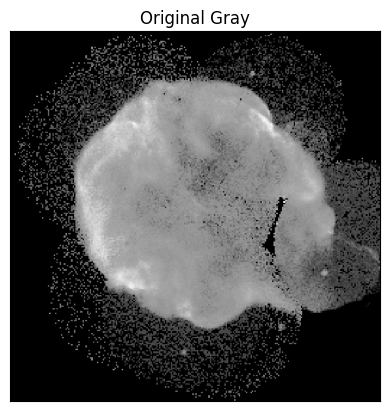

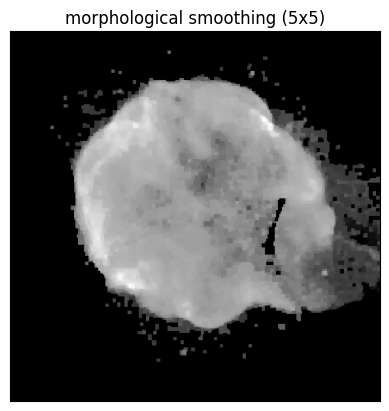

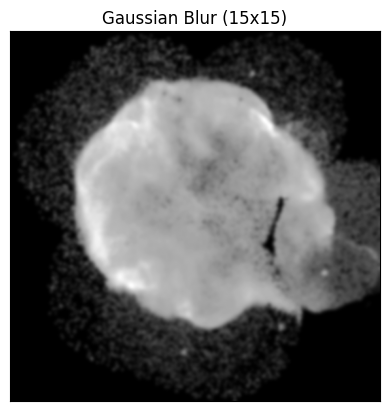

'\n형태학적 스무딩은 열림을 통해 노이즈를 제거하고 닫힘을 통해 구멍이나 틈새를 채우고, 객체의 연결 부분을 확장했다.\n배경이 부드러워지고 물체 경계는 유지되지만 디테일은 감소한다\n가우시안 블러는 주변 픽셀에 가우시안 가중치를 적용해 흐림 효과를 적용한다. 결과적으로 전체적으로 부드럽고 흐릿한 느낌을 주고 영상이 희미해진다.\n노이즈도 흐려지지만 엣지도 같이 흐려지는 단점이 존재한다.\n'

In [29]:
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif'
img = cv2.imread('Fig0938(a)(cygnusloop_Xray_original).tif')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")


# 그레이스케일로 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Original Gray")
plt.show()

# 구조 요소 정의
se = np.ones((5, 5), dtype=np.uint8)

# 형태학적 스무딩
b_opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, se)
b_closing = cv2.morphologyEx(b_opening, cv2.MORPH_CLOSE, se)
plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("morphological smoothing (5x5)")
plt.show()

# Smoothing Filter
gaussian_blur = cv2.GaussianBlur(gray, (15, 15), 0)
plt.imshow(gaussian_blur, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Gaussian Blur (15x15)")
plt.show()



"""
형태학적 스무딩은 열림을 통해 노이즈를 제거하고 닫힘을 통해 구멍이나 틈새를 채우고, 객체의 연결 부분을 확장했다.
배경이 부드러워지고 물체 경계는 유지되지만 디테일은 감소한다
가우시안 블러는 주변 픽셀에 가우시안 가중치를 적용해 흐림 효과를 적용한다. 결과적으로 전체적으로 부드럽고 흐릿한 느낌을 주고 영상이 희미해진다.
노이즈도 흐려지지만 엣지도 같이 흐려지는 단점이 존재한다.
"""

#2-9

--2025-04-11 06:16:39--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360574 (352K) [image/tiff]
Saving to: ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’

Fig0940(a)(rice_ima 100%[===================>] 352.12K  --.-KB/s    in 0.004s  

2025-04-11 06:16:39 (82.7 MB/s) - ‘Fig0940(a)(rice_image_with_intensity_gradient).tif’ saved [360574/360574]

이미지를 읽어왔습니다.
최적 임곗값 = 134.0


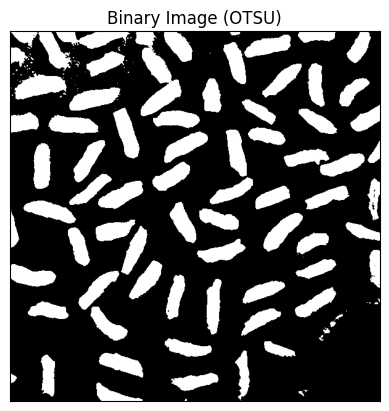

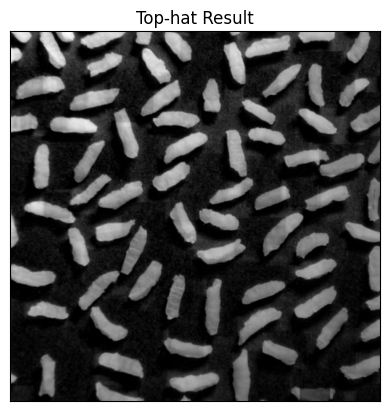

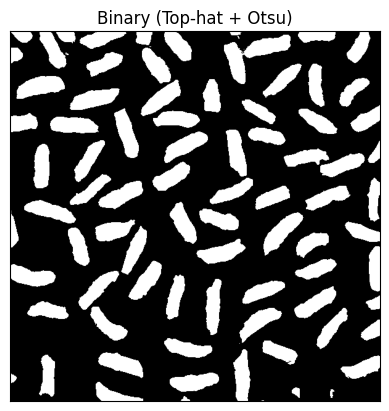

'\n비교분석\nOtus를 통해서 바로 이진화를 적용한 이미지는 배경이 불균일하거나 객체가 밝은 배경에 있는 객체는 처리가 완전하지 않다.\n반면에 top-hat을 진행하고 Otsu를 적용한 이미지는 깔끔하게 이진화 처리가 되었다.\n\n'

In [30]:
# 이미지 불러오기
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif'
img = cv2.imread('Fig0940(a)(rice_image_with_intensity_gradient).tif')
if img is not None:
    print("이미지를 읽어왔습니다.")
else:
    print("이미지를 읽어오지 못했습니다.")

# 그레이스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 오츠 이진화
t, bin_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print('최적 임곗값 =', t)

plt.imshow(bin_otsu, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Binary Image (OTSU)")
plt.show()

# Top-hat 변환
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
top_hat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)

# Top-hat 결과 이진화 (오츠)
_, bin_top_hat = cv2.threshold(top_hat, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(top_hat, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Top-hat Result")
plt.show()

plt.imshow(bin_top_hat, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.title("Binary (Top-hat + Otsu)")
plt.show()


"""
비교분석
Otus를 통해서 바로 이진화를 적용한 이미지는 배경이 불균일하거나 객체가 밝은 배경에 있는 객체는 처리가 완전하지 않다.
반면에 top-hat을 진행하고 Otsu를 적용한 이미지는 깔끔하게 이진화 처리가 되었다.

"""

#2-10

--2025-04-11 06:18:35--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 360678 (352K) [image/tiff]
Saving to: ‘Fig0943(a)(dark_blobs_on_light_background).tif’

Fig0943(a)(dark_blo 100%[===================>] 352.22K  --.-KB/s    in 0.007s  

2025-04-11 06:18:35 (51.8 MB/s) - ‘Fig0943(a)(dark_blobs_on_light_background).tif’ saved [360678/360678]



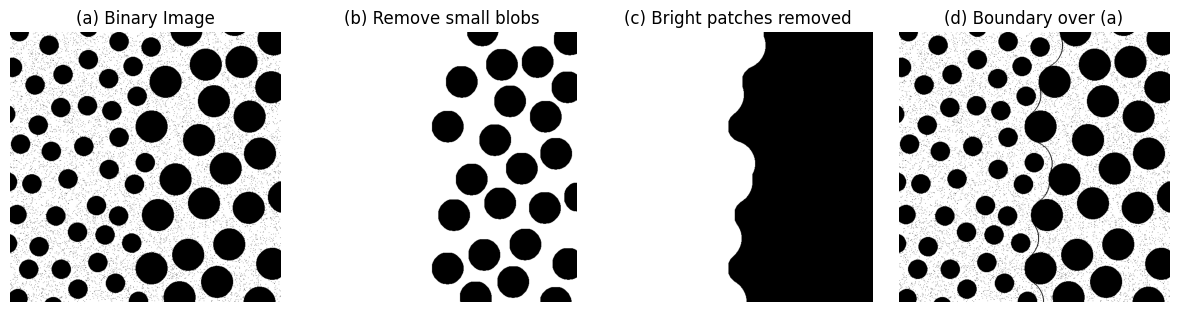

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드 및 이진화
!wget 'https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif'
img = cv2.imread('Fig0943(a)(dark_blobs_on_light_background).tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# (b) 작은 블롭 제거 (Closing)
se_b = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))  # 원형 구조 요소 사용
b_closing = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, se_b)

# (c) 밝은 패치 제거 (Opening)
se_c = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (100, 100))
c_opening = cv2.morphologyEx(b_closing, cv2.MORPH_OPEN, se_c)

# (d) Morphological Gradient → 경계 추출
se_d = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
d_dilation = cv2.dilate(c_opening, se_d)
d_erosion = cv2.erode(c_opening, se_d)
boundary = cv2.subtract(d_dilation, d_erosion)

# (d) 경계는 원본 이진 이미지 위에 덧입힘
overlay = bin_img.copy()
overlay[boundary > 0] = 0

# 결과 시각화
titles = ['(a) Binary Image', '(b) Remove small blobs', '(c) Bright patches removed', '(d) Boundary over (a)']
images = [bin_img, b_closing, c_opening, overlay]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
